In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
"""TRAIN"""
df = pd.read_csv("df_train.csv")
df_target = df["type"]
df_feats = df.drop(columns = ["type"])

X = df_feats
y = df_target


In [3]:
"""TEST"""
df_test = pd.read_csv("df_test.csv")
df_target_test = df_test["type"]
df_feats_test = df_test.drop(columns = ["type"])

X_test = df_feats_test
y_test = df_target_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      65 non-null     float64
 1   Na      65 non-null     float64
 2   Mg      65 non-null     float64
 3   Al      65 non-null     float64
 4   Si      65 non-null     float64
 5   K       65 non-null     float64
 6   Ca      65 non-null     float64
 7   Ba      65 non-null     float64
 8   Fe      65 non-null     float64
dtypes: float64(9)
memory usage: 4.7 KB


In [4]:
"""Min-Max Normalization"""
scaler = MinMaxScaler()
df_norm_feats = pd.DataFrame(scaler.fit_transform(df_feats), columns=["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"])

train_df_normalized = pd.concat([df_norm_feats, df_target], axis=1)

X_norm = train_df_normalized.drop(columns="type")
y_norm = train_df_normalized["type"]
X_norm.shape

(149, 9)

In [5]:
"""Min-Max Normalization"""
scaler = MinMaxScaler()
df_norm_feats_test = pd.DataFrame(scaler.fit_transform(df_feats_test), columns=["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"])

test_df_normalized = pd.concat([df_norm_feats_test, df_target_test], axis=1)

X_norm_test = test_df_normalized.drop(columns="type")
y_norm_test = test_df_normalized["type"]
X_norm_test.shape

(65, 9)

## PCA 

In [6]:
 from sklearn.preprocessing import StandardScaler
Xs = StandardScaler().fit_transform(X)
pca = PCA(n_components=7)
X_pca = pca.fit(Xs)


<function matplotlib.pyplot.show(close=None, block=None)>

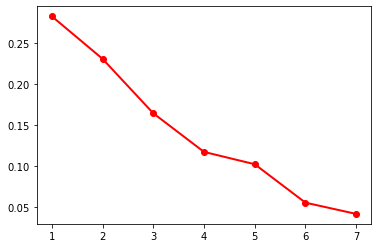

In [7]:
pca.explained_variance_ratio_

plt.plot(range(1,8), pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.show

In [8]:
pca.explained_variance_ratio_

array([0.28223186, 0.23040409, 0.1641962 , 0.11715043, 0.10215381,
       0.05537566, 0.0416824 ])

In [9]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
X_PCA = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])


Optimal n_components is equal to 4

## Decision Tree

In [10]:
"""Random Search for optimal hyperparameters with cross validation""" """DO NOT USE"""

param_dist = {"max_depth": randint(10, 50),
              "min_samples_split": randint(1, 20)}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

tree_cv.fit(X_norm,y_norm)

#tree_cv.fit(X,y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 20, 'min_samples_split': 2}
Best score is 0.6445977011494253


In [16]:
"""Grid Search for optimal hyper parameterds with cross validation on Normalized Data"""
hyperparameter_space = {'max_depth':[2,4,6,8,10,12,15,20,30,40,50],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}


for i in range (1,20): 

    gs = GridSearchCV(tree, param_grid=hyperparameter_space,
                      scoring="accuracy",
                      n_jobs=-1, cv=5, return_train_score=True)

    gs.fit(X_norm, y_norm)
    print("Optimal hyperparameter combination:", gs.best_params_, i)
    print()
    print("Mean cross-validated training accuracy score:",
          gs.best_score_, i)

Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 3} 1

Mean cross-validated training accuracy score: 0.6714942528735632 1
Optimal hyperparameter combination: {'max_depth': 20, 'min_samples_split': 4} 2

Mean cross-validated training accuracy score: 0.6579310344827587 2
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 3} 3

Mean cross-validated training accuracy score: 0.6512643678160919 3
Optimal hyperparameter combination: {'max_depth': 30, 'min_samples_split': 2} 4

Mean cross-validated training accuracy score: 0.651264367816092 4
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 2} 5

Mean cross-validated training accuracy score: 0.6577011494252873 5
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 5} 6

Mean cross-validated training accuracy score: 0.6579310344827587 6
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 3} 7

Mean cross-validated training accurac

In [17]:
"""Grid Search for optimal hyper parameterds with cross validation on unnormalized Data"""
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20,30,40,50],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}


for n in range (1,20):
    gs = GridSearchCV(tree, param_grid=hyperparameter_space,
                      scoring="accuracy",
                      n_jobs=-1, cv=5, return_train_score=True)

    gs.fit(X, y)
    print("Optimal hyperparameter combination:", gs.best_params_, n)
    print()
    print("Mean cross-validated training accuracy score:",
          gs.best_score_, n)

Optimal hyperparameter combination: {'max_depth': 40, 'min_samples_split': 4} 1

Mean cross-validated training accuracy score: 0.6510344827586207 1
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 4} 2

Mean cross-validated training accuracy score: 0.6579310344827587 2
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 4} 3

Mean cross-validated training accuracy score: 0.6581609195402298 3
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 4} 4

Mean cross-validated training accuracy score: 0.6579310344827587 4
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 3} 5

Mean cross-validated training accuracy score: 0.6645977011494253 5
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 2} 6

Mean cross-validated training accuracy score: 0.6645977011494253 6
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 2} 7

Mean cross-validated training accurac

In [37]:
"""Unnormalized"""
DTree_un = DecisionTreeClassifier(max_depth = 6, min_samples_split = 2)
DTree_un.fit(X, y)
#Predict test data set.
y_pred = DTree_un.predict(X_test)
#Checking performance our model with classification report.
#confusion_matrix = confusion_matrix(y_test,y_pred)
#print(confusion_matrix)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.76      0.74        21
           2       0.68      0.65      0.67        23
           3       0.50      0.40      0.44         5
           5       0.80      1.00      0.89         4
           6       0.50      0.67      0.57         3
           7       1.00      0.89      0.94         9

    accuracy                           0.72        65
   macro avg       0.70      0.73      0.71        65
weighted avg       0.73      0.72      0.72        65



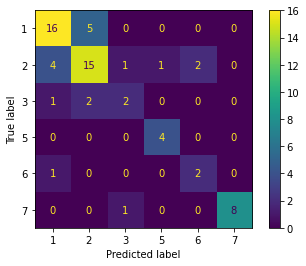

In [38]:
plot_confusion_matrix(DTree_un, X_test, y_test)  
plt.show()

In [34]:
DTree = DecisionTreeClassifier(max_depth = 6, min_samples_split = 3)
DTree.fit(X_norm, y_norm)
#Predict test data set.
y_pred = DTree.predict(X_norm_test)
#Checking performance our model with classification report.
#confusion_matrix = confusion_matrix(y_test,y_pred)
#print(confusion_matrix)
print(classification_report(y_norm_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.76      0.71        21
           2       0.68      0.65      0.67        23
           3       0.00      0.00      0.00         5
           5       0.50      0.75      0.60         4
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.68        65
   macro avg       0.62      0.62      0.61        65
weighted avg       0.66      0.68      0.66        65



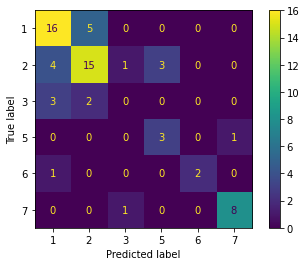

In [39]:
plot_confusion_matrix(DTree, X_norm_test, y_norm_test)  
plt.show()

In [21]:
"""Grid Search for optimal hyper parameterds with cross validation on PCA"""
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20,30,40,50],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}
tree = DecisionTreeClassifier()

for p in range (1,20):
    gs = GridSearchCV(tree, param_grid=hyperparameter_space,
                      scoring="accuracy",
                      n_jobs=-1, cv=5, return_train_score=True)

    gs.fit(X_PCA, y)
    print("Optimal hyperparameter combination:", gs.best_params_, p)
    print()
    print("Mean cross-validated training accuracy score:",
          gs.best_score_, p)



Optimal hyperparameter combination: {'max_depth': 10, 'min_samples_split': 4} 1

Mean cross-validated training accuracy score: 0.638390804597701 1
Optimal hyperparameter combination: {'max_depth': 10, 'min_samples_split': 2} 2

Mean cross-validated training accuracy score: 0.6452873563218391 2
Optimal hyperparameter combination: {'max_depth': 40, 'min_samples_split': 3} 3

Mean cross-validated training accuracy score: 0.6457471264367817 3
Optimal hyperparameter combination: {'max_depth': 12, 'min_samples_split': 3} 4

Mean cross-validated training accuracy score: 0.6524137931034483 4
Optimal hyperparameter combination: {'max_depth': 50, 'min_samples_split': 3} 5

Mean cross-validated training accuracy score: 0.6388505747126436 5
Optimal hyperparameter combination: {'max_depth': 40, 'min_samples_split': 3} 6

Mean cross-validated training accuracy score: 0.6455172413793103 6
Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_split': 3} 7

Mean cross-validated training acc

In [41]:
X_test_PCA = pca.fit_transform(X_test)

In [42]:
DTree = DecisionTreeClassifier(max_depth = 6, min_samples_split = 3)
DTree.fit(X_PCA, y)
#Predict test data set.
y_pred = DTree.predict(X_test_PCA)
#Checking performance our model with classification report.
#confusion_matrix = confusion_matrix(y_test,y_pred)
#print(confusion_matrix)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.90      0.69        21
           2       0.61      0.48      0.54        23
           3       0.00      0.00      0.00         5
           5       0.12      0.25      0.17         4
           6       0.00      0.00      0.00         3
           7       1.00      0.11      0.20         9

    accuracy                           0.49        65
   macro avg       0.38      0.29      0.27        65
weighted avg       0.54      0.49      0.45        65



## KNearest Neighbors


In [69]:
"""KNN Hyperparametertuning unnormalized data"""
n_neighbors = list(range(2,30))
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=5)
#Fit the model
clf.fit(X,y)
print("Optimal hyperparameter combination:", clf.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      clf.best_score_)

Optimal hyperparameter combination: {'n_neighbors': 10}

Mean cross-validated training accuracy score: 0.6583908045977012


In [35]:
"""KNN Hyperparametertuning normalized data"""
n_neighbors = list(range(2,30))
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=5)
#Fit the model
clf.fit(X_norm,y_norm)
print("Optimal hyperparameter combination:", clf.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      clf.best_score_)

Optimal hyperparameter combination: {'n_neighbors': 3}

Mean cross-validated training accuracy score: 0.6445977011494253


In [35]:
knn_1 = KNeighborsClassifier(n_neighbors = 3)
knn_1.fit(X_norm, y_norm)
#Predict test data set.
y_pred = knn_1.predict(X_norm_test)
#Checking performance our model with classification report.
print(classification_report(y_norm_test, y_pred))


              precision    recall  f1-score   support

           1       0.61      0.90      0.73        21
           2       0.84      0.70      0.76        23
           3       0.00      0.00      0.00         5
           5       0.60      0.75      0.67         4
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.74        65
   macro avg       0.68      0.65      0.65        65
weighted avg       0.72      0.74      0.71        65



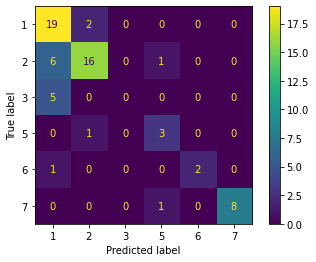

In [36]:
plot_confusion_matrix(knn_1, X_norm_test, y_norm_test)  
plt.show()

In [20]:
knn_1 = KNeighborsClassifier(n_neighbors = 3)
knn_1.fit(X_PCA, y)
#Predict test data set.
y_pred = knn_1.predict(X_test_PCA)
#Checking performance our model with classification report.
#confusion_matrix = confusion_matrix(y_test,y_pred)
#print(confusion_matrix)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.62      0.52        21
           2       0.50      0.48      0.49        23
           3       0.00      0.00      0.00         5
           5       0.33      0.75      0.46         4
           6       0.00      0.00      0.00         3
           7       1.00      0.44      0.62         9

    accuracy                           0.48        65
   macro avg       0.38      0.38      0.35        65
weighted avg       0.48      0.48      0.45        65



## Random Forest

In [38]:
"""RANDOM SEARCH"""
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [24]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_norm, y_norm)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [25]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [26]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_norm, y_norm)
base_accuracy = evaluate(base_model, X_norm_test, y_norm_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_norm_test, y_norm_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5385 degrees.
Accuracy = 72.39%.
Model Performance
Average Error: 0.3846 degrees.
Accuracy = 79.41%.
Improvement of 9.70%.


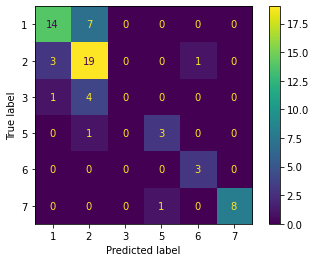

In [39]:
plot_confusion_matrix(best_random, X_norm_test, y_norm_test)  
plt.show()